# Exploring and Preparing Data

SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

Exploratory Data Analysis will be conducted in this notebook.




## Objectives


Perform Exploratory Data Analysis using Pandas and Matplotlib to answer business questions;
1. How does the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome?
2. Is there a relationship between
    a. Payload and Launch Site?
    b. Success rate of each orbit type?
    c. FlightNumber and Orbit type?
    d. Payload and Orbit type?
3. Visualize the launch success yearly trend

In [4]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [23]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [6]:
import requests
import pandas as pd
from io import StringIO

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response = requests.get(URL)

if response.status_code == 200:
    data = response.text
    df = pd.read_csv(StringIO(data))
    print(df.head(5))
else:
    print("Failed to fetch data:", response.status_code)

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

In [7]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


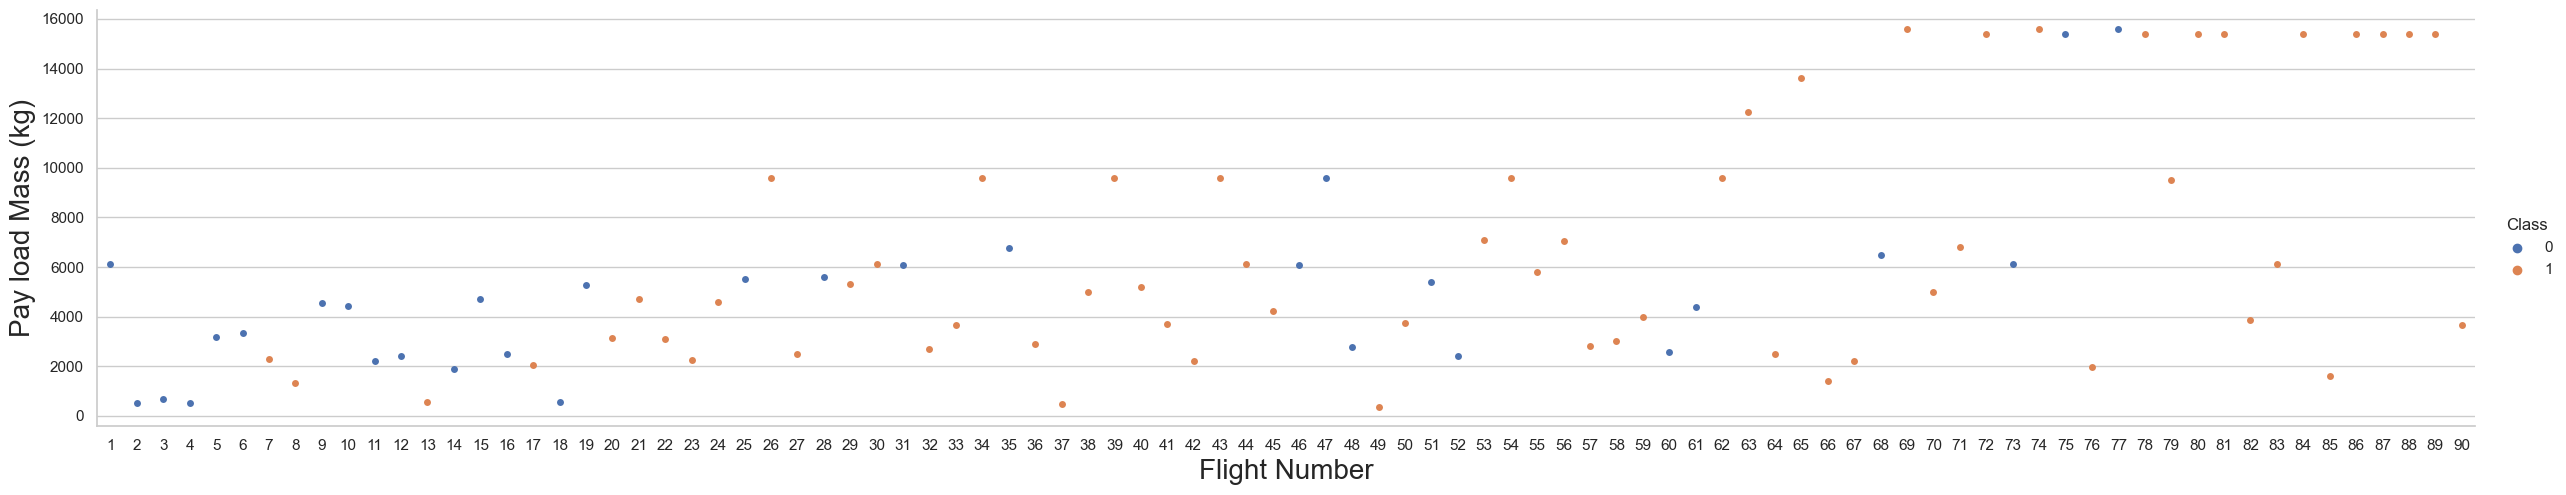

In [24]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

We see that different launch sites have different success rates. CCAFS LC-40, has a success rate of 60 %, while KSC LC-39A and VAFB SLC 4E has a success rate of 77%.

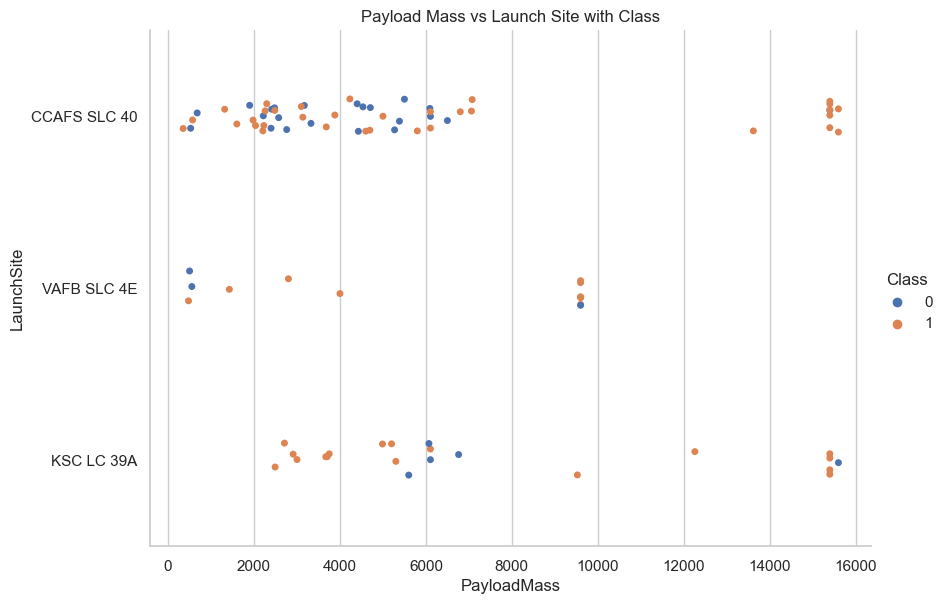

In [29]:
#Visualize the relationship between Payload and Launch Site
sns.catplot(x='PayloadMass', y='LaunchSite', hue='Class', kind='strip', data=df, height=6, aspect=1.5)

plt.title('Payload Mass vs Launch Site with Class')
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10000).

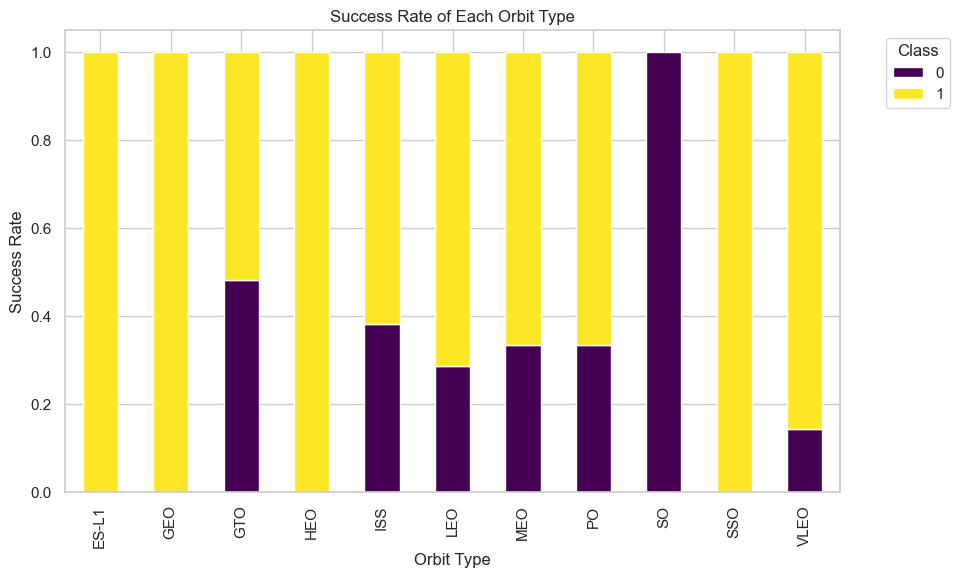

In [27]:
#Visualize the relationship between success rate of each orbit type
success_rates = df.groupby('Orbit')['Class'].value_counts(normalize=True).unstack().fillna(0)

# Create a bar plot
success_rates.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))

plt.title('Success Rate of Each Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

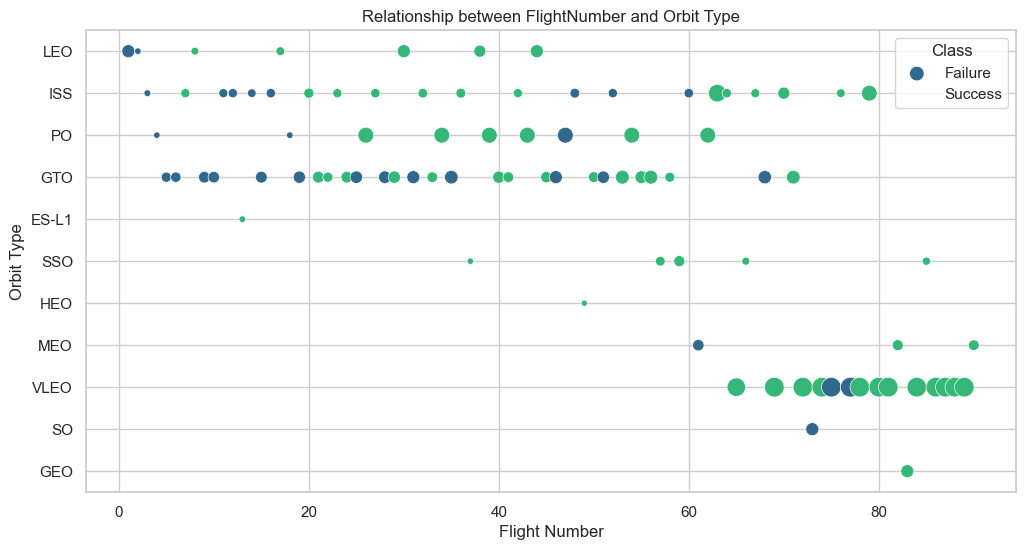

In [28]:
# Visualize the relationship between FlightNumber and Orbit type
plt.figure(figsize=(12, 6))
sns.scatterplot(x='FlightNumber', y='Orbit', hue='Class', data=df, palette='viridis', size='PayloadMass', sizes=(20, 200))
plt.title('Relationship between FlightNumber and Orbit Type')
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.legend(title='Class', loc='upper right', labels=['Failure', 'Success'])
plt.show()

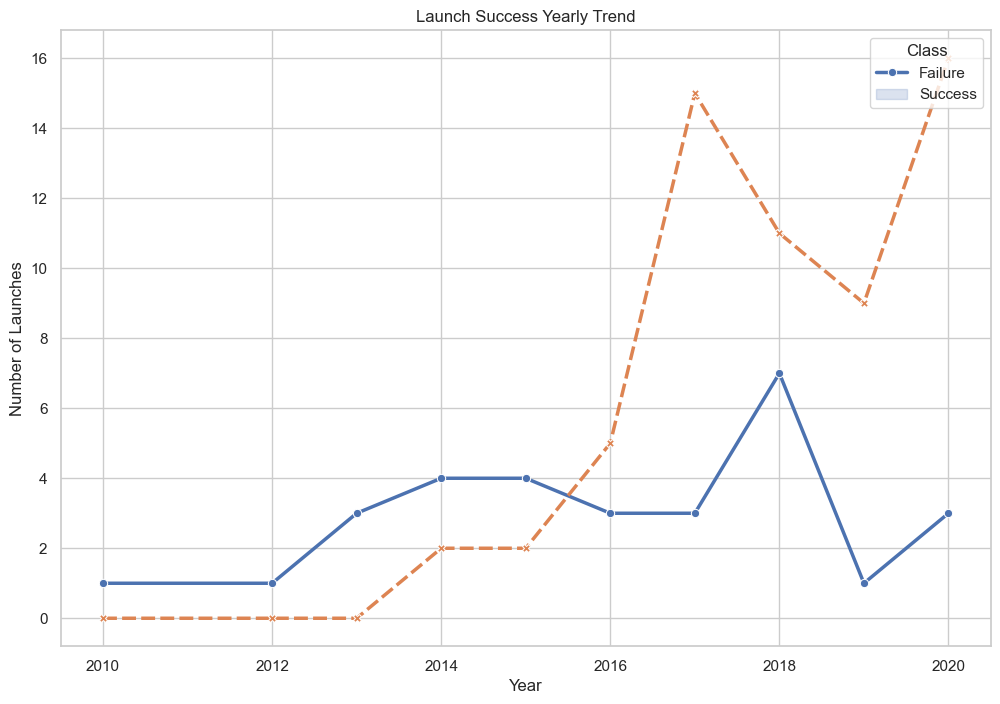

In [32]:
# Visualize the launch success yearly trend
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Group the data by year and class, then count the number of launches
yearly_trend = df.groupby(['Year', 'Class']).size().unstack(fill_value=0)

# Plot line chart for launch success over the years
plt.figure(figsize=(12, 8))
sns.lineplot(data=yearly_trend, markers=True, linewidth=2.5)
plt.title('Launch Success Yearly Trend')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.legend(title='Class', loc='upper right', labels=['Failure', 'Success'])
plt.show()

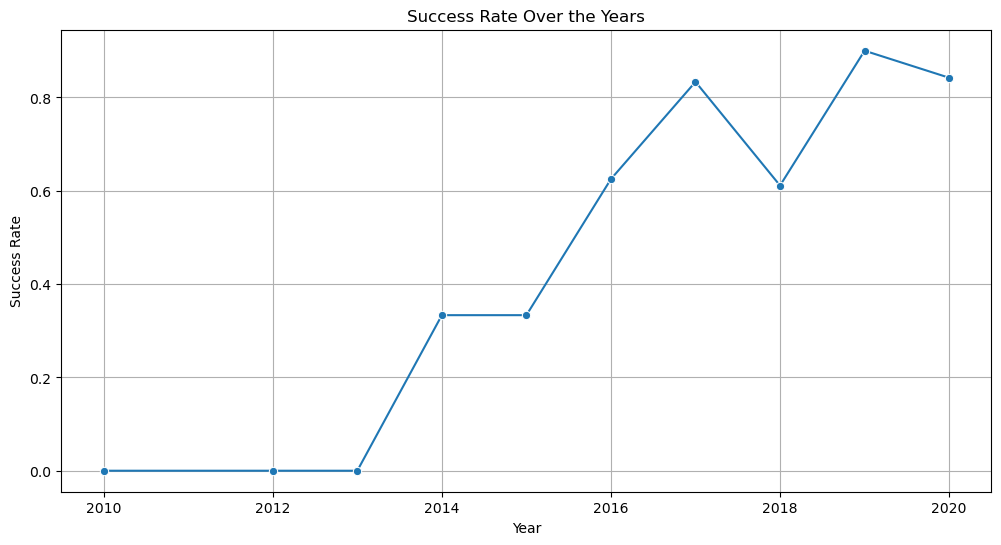

In [15]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year and create a new column 'Year'
df['Year'] = df['Date'].dt.year

success_rate_by_year = df.groupby('Year')['Class'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=success_rate_by_year.index, y=success_rate_by_year.values, marker='o')
plt.title('Success Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.grid(True)
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020

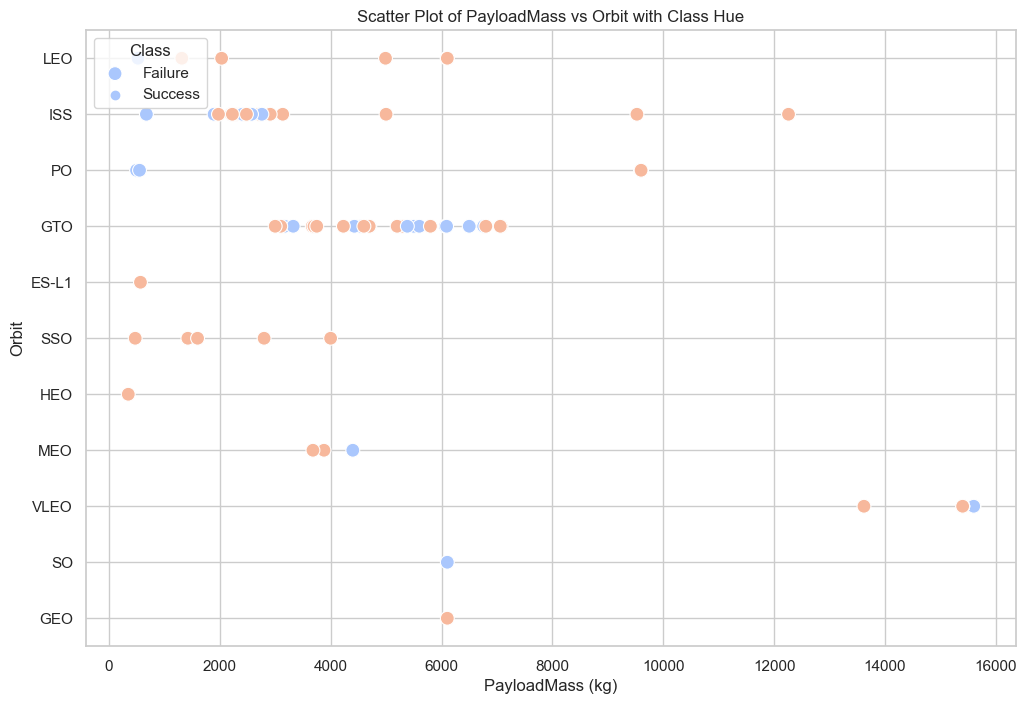

In [17]:
### TASK  5: Visualize the relationship between Payload and Orbit type
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PayloadMass', y='Orbit', hue='Class', data=df, palette='coolwarm', s=100)
plt.title('Scatter Plot of PayloadMass vs Orbit with Class Hue')
plt.xlabel('PayloadMass (kg)')
plt.ylabel('Orbit')
plt.legend(title='Class', loc='upper left', labels=['Failure', 'Success'])
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.